In [12]:
import torch
from torch import nn
from d2l import torch as d2l

# 用神经网络实现mnist图像分类，实际上就是多了一层隐藏层

In [13]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [14]:
num_inputs=28*28
num_output=10
num_hiddens=256

W1=nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2=nn.Parameter(torch.randn(num_hiddens,num_output,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_output,requires_grad=True))

params=[W1,b1,W2,b2]

In [15]:
def relu(X):
    a=torch.zeros_like(X) # 创建一个和给定张量形状一致，但全为0的新张量
    return torch.max(X,a) # 两个张量逐元素取最大值

In [16]:
def net(X):
    X=X.reshape((-1,num_inputs))
    H=relu(X@W1+b1)
    return  (H@W2+b2)

In [17]:
loss=nn.CrossEntropyLoss()

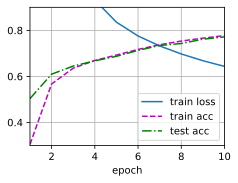

In [18]:
num_epochs,lr=10,0.01
updater=torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

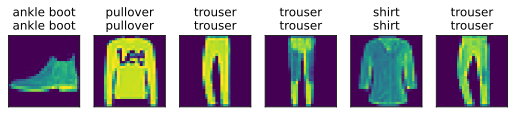

In [19]:
d2l.predict_ch3(net,test_iter)